In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from mpl_toolkits import mplot3d
# 
file = pd.read_csv('salary.csv')
file = file.dropna()
np.where(pd.isnull(file))

(array([], dtype=int64), array([], dtype=int64))

In [88]:
file.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


In [112]:
# Initializing our data
# Data relative to it's Field of work
xe,ye = np.array(file[file.Field == 1]['yearsworked']),np.array(file[file.Field == 1]['salary']) #Engineering Field
xf,yf = np.array(file[file.Field == 2]['yearsworked']),np.array(file[file.Field == 2]['salary']) # Fincance Field
xh,yh = np.array(file[file.Field == 3]['yearsworked']), np.array(file[file.Field == 3]['salary']) # HR Field
xm,ym = np.array(file[file.Field == 4]['yearsworked']),np.array(file[file.Field == 4]['salary']) #Markerting Field 
# Salary and yearsworked
x = np.array(file['yearsworked'])  #Years worked by employee
y = np.array(file['salary'])  #Salary earned by employee

# (a) Run a simple linear regression for Salary with one predictor variable: Years Worked

## (i)	What percentage of the variance in employees’ salaries is accounted for by the number of years they have worked?

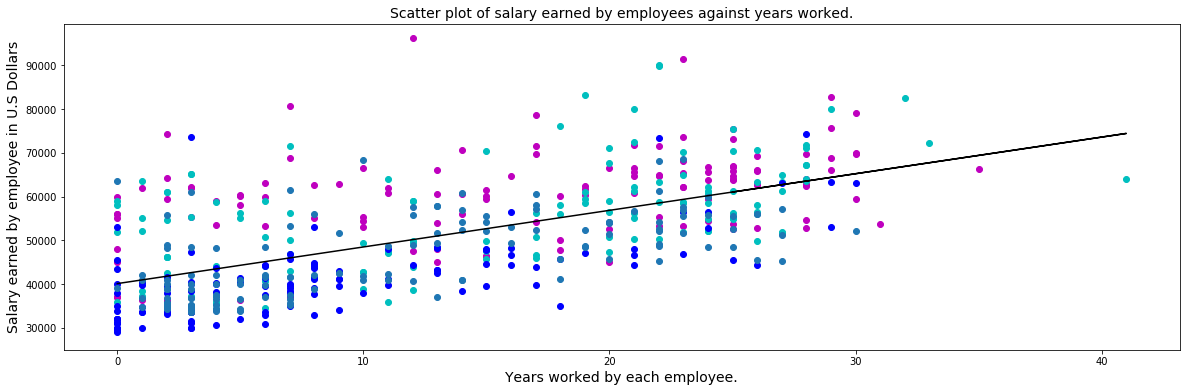

In [110]:
# Plotting our Data. 
plt.scatter(xe,ye,color='m')
plt.scatter(xf,yf,c='c')
plt.scatter(xh,yh,c='b')
plt.scatter(xm,ym)
z = np.polyfit(x,y,1)
p = np.poly1d(z)
plt.plot(x,p(x), 'k')
plt.xlabel('Years worked by each employee.', fontsize=14)
plt.ylabel('Salary earned by employee in U.S Dollars', fontsize=14)
plt.title('Scatter plot of salary earned by employees against years worked.',fontsize=14)
plt.show()

In [109]:
# calculate Pearson's correlation coefficient 
slope, intercept, r, p, std_err = stats.linregress(x,y)
std = np.std(y)
louise = r**2 * 100 #coefficient of determination
print(louise)

38.88630734996


## (ii) Does the model significantly predict the dependent variable? Report the amount of variance explained (R2) and significance value (p) to support your answer.

##### - yes it does, because our p-value is well-below our significance threshold of 0.05 . Meaning our coefficient of determination (0.3886307) is most likely to be correct. 

## iii)	Report and interpret the standard error of the estimate. (Hint: Compare the standard error of the estimate to the standard deviation for Salary, which you would have calculated in Question 1.a))

In [97]:
print('std :',std)
print('std_err :',std_err)

std : 12672.762650138267
std_err : 46.43634621012886


#####  the avarage difference of the predicted amounts to the actual amount in the "yearsworked" and ''salary'' is 46.44 .

# b)	Examine the output from the Coefficients table:

## (i)	What does the unstandardized coefficient (B) tell you about the relationship between Years Worked and Salary?

In [4]:
sample = pd.DataFrame(file["yearsworked"]).sort_values('yearsworked').reset_index()
sample = sample.loc[[6,44, 50, 100, 130, 150]]
predicted_salary = 0

def predict_salary(yearsworked):
    return slope * year + intercept

for year in sample.yearsworked:
    last_salary = predicted_salary
    predicted_salary = slope * year + intercept
    difference = predicted_salary - last_salary
    print("Years Worked: " + str(year) + " | Predicted Salary = " + str(predicted_salary) + " | Difference = " + str(difference))

Years Worked: 0 | Predicted Salary = 40115.0137875915 | Difference = 40115.0137875915
Years Worked: 1 | Predicted Salary = 40952.34557759235 | Difference = 837.3317900008478
Years Worked: 2 | Predicted Salary = 41789.67736759319 | Difference = 837.3317900008406
Years Worked: 3 | Predicted Salary = 42627.00915759404 | Difference = 837.3317900008478
Years Worked: 4 | Predicted Salary = 43464.34094759488 | Difference = 837.3317900008406
Years Worked: 5 | Predicted Salary = 44301.67273759573 | Difference = 837.3317900008478


##### It tells us that for every year worked an employee earns R837 more per annum. 

## (ii)	Compare the standardised coefficient (Beta) for Years Worked to the Pearson’s (zero-order) correlation coefficient from question 1.c). What do you notice? Explain why this is so. 


In [98]:
std_x = np.std(x)
std_y = np.std(y)

predicted_salary_Std = slope * std_x + intercept
predicted_salary_Std = predicted_salary_Std / std_y
print(predicted_salary_Std)
print(r)

3.789040227476409
0.6235888657598049


* When we compare Standardised coefficient and correlation coefficient of the years worked, we notice that both our coefficient concur with each other that there is a positive relation between X and Y, because our r value (0.62)  shows that there is a positive relationship between our variables(x(years worked) and y(Salary)) and our Standardised coefficient (Beta) shows that when there is a 1 std increase in the years worked there is an increase of 3.75 std in the Salary earned. 
* We also note that both our coefficients have different ranges, we note that the data's standardised coefficient can be larger than 1, but the correlation coefficient cannot be larger than one. 

## (iii)	Calculate the expected salary for someone who graduated 12 years ago.

In [20]:
Predicted_salary_12 = slope * 12 + intercept
print(Predicted_salary_12 )

50162.99526760164


## (iv)	Calculate the expected salary for someone who graduated 80 years ago. Are there any problems with this prediction? If so, what are they?

In [28]:
p80 = slope * 80 + intercept
print(p80)

107101.55698765905


* No, there is no problem.

# c)	We have only looked at the number of years and employee has worked. What are employee characteristics might influence their salary?


#### Position, Field of work, gender, level of education, experience prior to current position, market value and years worked at current position 